In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # for imputing missing values
from sklearn.preprocessing import StandardScaler # for standardizing data
from sklearn.svm import SVR # for SVM regression
from csvToExcel import toExcel

In [2]:
def checkMissingData():
    df = pd.read_csv('DataFolder/data.csv')
    print(df.info())
    
checkMissingData()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [3]:
# Fill missing values with mean
def missingDataHandler():
    df = pd.read_csv('DataFolder/data.csv')
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    # From the missing data analysis, we know that the columns 'Daily tests', 'Cases', 'Deaths' have missing values
    missingColumns = ['Daily tests', 'Cases', 'Deaths']
    for column in missingColumns:
        df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1))
    print(df.info())
    return df
    
dataFrame = missingDataHandler()
toExcel(dataFrame, 'preprocessedData')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [4]:
# Get the data for Greece until 2020-12-31
def getGreeceData(df):
    df = df[df['Entity'] == 'Greece']
    df = df[df['Date'] <= '2020-12-31']
    return df

dataFrame2 = getGreeceData(dataFrame)

In [5]:
# Add new columns for positivity percent and daily cases
def addPositivityPercent(df):
    df['Daily Cases'] = abs(df['Cases'].diff())
    df['Positivity percent'] = df['Daily Cases'] / df['Daily tests']
    df['Date'] = pd.to_datetime(df['Date'])
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    df['Positivity percent'] = imputer.fit_transform(df['Positivity percent'].values.reshape(-1, 1))
    df['Daily Cases'] = imputer.fit_transform(df['Daily Cases'].values.reshape(-1, 1))
    return df

dataset = addPositivityPercent(dataFrame2)
toExcel(dataset, 'GreeceData')
print(dataset.info())

Data has been successfully inserted into the Excel file.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 11802 to 12111
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Entity                           310 non-null    object        
 1   Continent                        310 non-null    object        
 2   Latitude                         310 non-null    float64       
 3   Longitude                        310 non-null    float64       
 4   Average temperature per year     310 non-null    int64         
 5   Hospital beds per 1000 people    310 non-null    float64       
 6   Medical doctors per 1000 people  310 non-null    float64       
 7   GDP/Capita                       310 non-null    float64       
 8   Population                       310 non-null    int64         
 9   Median age                       310 non-null    int64         
 10 

In [6]:
# Here starts the training of the model
X = dataset.iloc[:, 11].values # The independent variable is the dates
y = dataset.iloc[:, -1].values # The dependent variable is the positivity percent
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

In [7]:
print(X)

[['2020-02-26T00:00:00.000000000']
 ['2020-02-27T00:00:00.000000000']
 ['2020-02-28T00:00:00.000000000']
 ['2020-02-29T00:00:00.000000000']
 ['2020-03-01T00:00:00.000000000']
 ['2020-03-02T00:00:00.000000000']
 ['2020-03-03T00:00:00.000000000']
 ['2020-03-04T00:00:00.000000000']
 ['2020-03-05T00:00:00.000000000']
 ['2020-03-06T00:00:00.000000000']
 ['2020-03-07T00:00:00.000000000']
 ['2020-03-08T00:00:00.000000000']
 ['2020-03-09T00:00:00.000000000']
 ['2020-03-10T00:00:00.000000000']
 ['2020-03-11T00:00:00.000000000']
 ['2020-03-12T00:00:00.000000000']
 ['2020-03-13T00:00:00.000000000']
 ['2020-03-14T00:00:00.000000000']
 ['2020-03-15T00:00:00.000000000']
 ['2020-03-16T00:00:00.000000000']
 ['2020-03-17T00:00:00.000000000']
 ['2020-03-18T00:00:00.000000000']
 ['2020-03-19T00:00:00.000000000']
 ['2020-03-20T00:00:00.000000000']
 ['2020-03-21T00:00:00.000000000']
 ['2020-03-22T00:00:00.000000000']
 ['2020-03-23T00:00:00.000000000']
 ['2020-03-24T00:00:00.000000000']
 ['2020-03-25T00:00:

In [8]:
print(y)

[[2.94613023e-02]
 [5.07091756e-05]
 [2.53545878e-05]
 [0.00000000e+00]
 [7.60637634e-05]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.07091756e-05]
 [5.57800931e-04]
 [3.54964229e-04]
 [2.53545878e-05]
 [6.84573870e-04]
 [0.00000000e+00]
 [4.05673405e-04]
 [2.53545878e-04]
 [0.00000000e+00]
 [1.75000000e-01]
 [5.42857143e-02]
 [1.71666667e-01]
 [0.00000000e+00]
 [1.41985692e-03]
 [7.85992222e-04]
 [0.00000000e+00]
 [1.95230326e-03]
 [5.31914894e-02]
 [5.34090909e-01]
 [1.11285266e-01]
 [1.12412178e-01]
 [5.47752809e-02]
 [1.80017573e-03]
 [1.87623950e-03]
 [1.07223476e-01]
 [1.20558376e-01]
 [6.91358025e-02]
 [1.32295720e-01]
 [1.63430421e-01]
 [8.63453815e-02]
 [1.92040078e-02]
 [6.69642857e-02]
 [2.92452830e-02]
 [2.70270270e-02]
 [3.22040987e-02]
 [1.31845842e-02]
 [6.41952984e-02]
 [3.11457175e-02]
 [3.66108787e-02]
 [6.71140940e-03]
 [2.64957265e-02]
 [6.33864695e-04]
 [5.57800931e-04]
 [7.49625187e-03]
 [7.53880266e-03]
 [6.68693009e-03]
 [0.00000000e+00]
 [2.53545878e-04]
 [1.180030

In [9]:
# Standardize the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [10]:
# Train the model
regressor = SVR(kernel = 'rbf') # Create the regressor
regressor.fit(X, y) # Train the model

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [11]:
# Get the data for Greece on 2021-01-01
# We will use this data to predict the positivity percent
newDataset = dataFrame[dataFrame['Entity'] == 'Greece']
newDataset = newDataset[newDataset['Date'] == '2021-01-01']
newDataset['Daily Cases'] = abs(newDataset['Cases'].diff())
newDataset['Positivity percent'] = newDataset['Daily Cases'] / newDataset['Daily tests']
newDataset['Date'] = pd.to_datetime(newDataset['Date'])
# print(newDataset.info())
testX = newDataset.iloc[:, 11].values
# print(testX)

In [12]:
# Predict the positivity percent for 2021-01-01
sc_y.inverse_transform(regressor.predict(sc_X.transform([testX])).reshape(1, -1))

array([[0.02711721]])

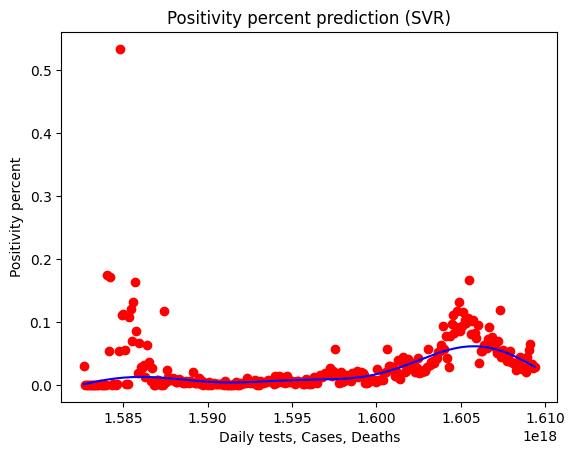

In [13]:
# Plot the results
x_axis = sc_X.inverse_transform(X)
y_axis = sc_y.inverse_transform(y)
plt.scatter(x_axis, y_axis, color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Positivity percent prediction (SVR)')
plt.xlabel('Daily tests, Cases, Deaths')
plt.ylabel('Positivity percent')
plt.show()

In [14]:
# Error code

# X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
# plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
# plt.title('Positivity percent prediction (SVR)')
# plt.xlabel('Daily tests, Cases, Deaths')
# plt.ylabel('Positivity percent')
# plt.show()